# Images location 1 - Date 1 - Dir 2

### Dataset preview image

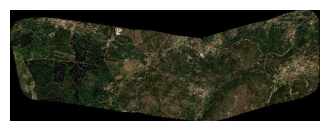

In [1]:
preview_img = '/mnt/0D6BEAD6291820B7/Wilgo/Datasets/dataset_spotLite/images/images_location1/date_1/7070555101/IMG_PHR1A_PMS_001/PREVIEW_PHR1A_PMS_202407221132261_ORT_7070555101.JPG'
import func
func.show_img_jpg(preview_img)

### Show the tiles of the dataset

In [2]:
import tifffile as tiff
import importlib
importlib.reload(func)

base_path = '/mnt/0D6BEAD6291820B7/Wilgo/Datasets/dataset_spotLite/images/images_location1/date_1/7070555101/IMG_PHR1A_PMS_001'
prefix = 'IMG_PHR1A_PMS_202407221132261_ORT_7070555101'

tile_paths, rows, cols = func.generate_tile_paths_auto(base_path, prefix)

for row in range(rows):
    for col in range(cols):
        ind = col +  row * cols
        read_img = tiff.imread(tile_paths[ind])
        print(f'Shape TILE R{row+1}C{col+1}: {read_img.shape}')

print(f'We have {ind+1} images (tiles)')

Shape TILE R1C1: (8842, 16384, 4)
Shape TILE R1C2: (8842, 8132, 4)
We have 2 images (tiles)


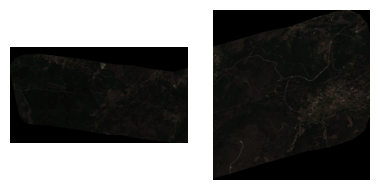

In [3]:
import importlib
importlib.reload(func)

func.show_all_tiles_grid(tile_paths, rows, cols)

### CRS tiles and sharpfile and transform

In [4]:
import importlib
importlib.reload(func)

label_path = "/mnt/0D6BEAD6291820B7/Wilgo/Datasets/dataset_spotLite/labels/labels_location_1/species_workingshp_3.shp"
label_name = "/mnt/0D6BEAD6291820B7/Wilgo/Datasets/dataset_spotLite/labels/labels_location_1/class_nomenclature.txt"

gdf, class_labels = func.show_classes(label_path, label_name)
new_gdf = func.same_CRS(base_path, gdf)


🧩 Unique class IDs found: [1, 2, 3, 4, 5]
🔠 Class names:
  1: no trees
  2: other trees/vegetation
  3: pinus
  4: eucalyptus
  5: shadow

---------CRS-----------
The CRS are iguals: False
CRS Img: EPSG:4326
CRS shapefile: EPSG:3763

-----AFTER TRANSFORM------------
The CRS are iguals: True
CRS Img: EPSG:4326
CRS shapefile: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


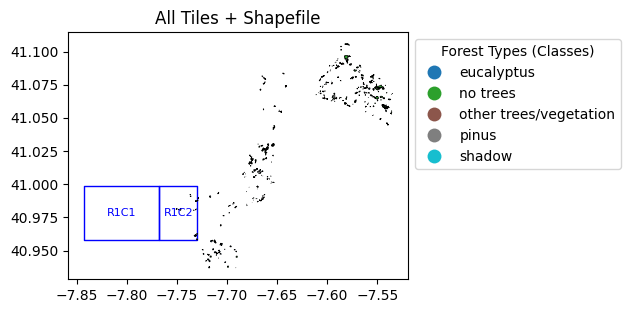

In [5]:
import importlib
importlib.reload(func)

# Show all classes
func.plot_tiles_and_shapefile(base_path, new_gdf, class_labels=class_labels)

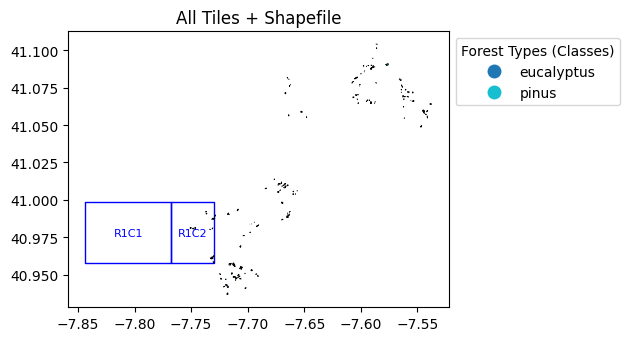

In [6]:
import importlib
importlib.reload(func)

# Show only pinus and eucalyptus
func.plot_tiles_and_shapefile(base_path, new_gdf, class_labels=class_labels, filter_classes=[3, 4])

### Having dataset with Tiles and Mask

In [7]:
import importlib
importlib.reload(func)
import geopandas as gpd

gdf_labels = gpd.read_file(label_path)
gdf_tiles = func.get_tiles_bounds(base_path)

gdf_joined = func.assign_labels_to_tiles(gdf_labels, gdf_tiles)

## ALL CLASSES
tile_ids = gdf_tiles['tile_id'].tolist()
print("Available Tiles:", tile_ids)
print("Tiles with labels:", gdf_joined['tile_id'].unique())

Available Tiles: ['R1C1', 'R1C2']
Tiles with labels: ['R1C2']


In [8]:
import importlib
importlib.reload(func)

desired_classes = [3, 4]  # For example: 3 = pinus, 4 = eucalyptus

filtered_labels = gdf_joined[gdf_joined['classnum2'].isin(desired_classes)].copy()

tile_ids_with_labels = filtered_labels['tile_id'].unique()

filtered_tile_paths = [p for p in tile_paths if func.get_tile_id_from_path(p) in tile_ids_with_labels]

tiles_data = func.load_full_images_and_masks(filtered_tile_paths, filtered_labels)

✅ Loaded 1 tiles into memory.


### Verify dataset

In [9]:
import importlib
importlib.reload(func)

for tile in tiles_data:
    print(f"Tile: {tile['tile_id']} -> Tile shape: {tile['image'].shape}, Mask shape: {tile['mask'].shape}")

Tile: R1C2 -> Tile shape: (4, 8842, 8132), Mask shape: (8842, 8132)


In [10]:
import importlib
importlib.reload(func)

func.check_class_distribution_in_tiles_data(tiles_data)

R1C2: classes found -> [0 3 4]

✅ Total unique classes across all masks: [0, 3, 4]
📊 Total pixel count and class percentage:
  Class 0: 71,666,055 pixels (99.67%)
  Class 3: 41,528 pixels (0.06%)
  Class 4: 195,561 pixels (0.27%)


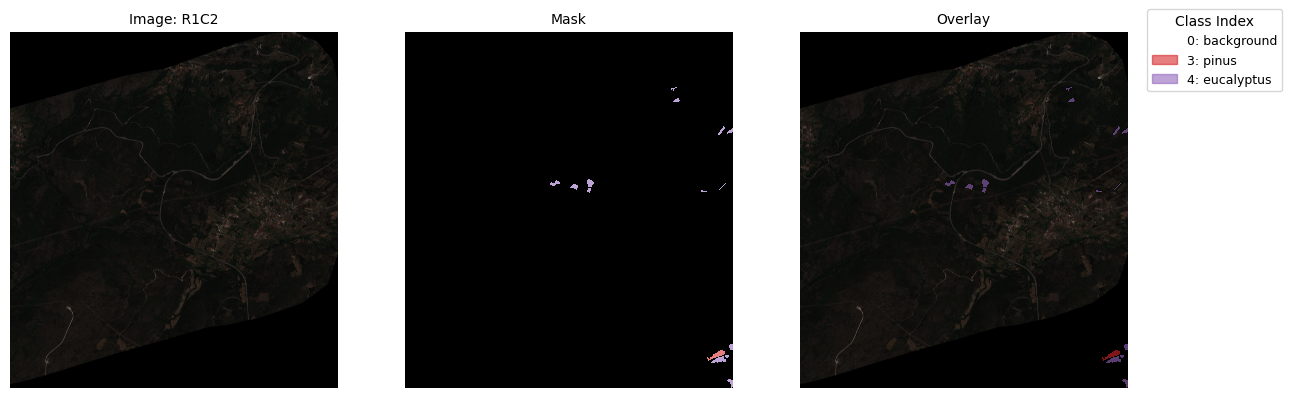

In [11]:
import importlib
importlib.reload(func)

func.visualize_tiles_data(tiles_data, desired_classes)

### Create dataset in patches format

In [12]:
import importlib
importlib.reload(func)

dataset_dir = 'spotlite_dataset_loca1_date1_dir2'
func.generate_patches_from_tiles_data(tiles_data, dataset_dir, 256)

✅ 23 patches saved from tile R1C2

🎉 Finished: 23 total image/mask pairs saved in 'spotlite_dataset_loca1_date1_dir2'


In [13]:
import os
import tifffile as tiff

n = 5 

images_dataset_dir = os.path.join(dataset_dir, 'images')
masks_dataset_dir = os.path.join(dataset_dir, 'masks')

image_files = sorted(os.listdir(images_dataset_dir))
mask_files = sorted(os.listdir(masks_dataset_dir))

n = min(n, len(image_files), len(mask_files))
image_files = image_files[:n]
mask_files = mask_files[:n]

print('Shape of each image and its mask:')
for image_file, mask_file in zip(image_files, mask_files):
    image_path = os.path.join(images_dataset_dir, image_file)
    mask_path = os.path.join(masks_dataset_dir, mask_file)

    read_img = tiff.imread(image_path)
    read_mask = tiff.imread(mask_path)

    print(f'{image_file} -> Image: {read_img.shape}, Mask: {read_mask.shape}')


Shape of each image and its mask:
R1C2_patch_1280_6400.tif -> Image: (256, 256, 4), Mask: (256, 256)
R1C2_patch_1280_6656.tif -> Image: (256, 256, 4), Mask: (256, 256)
R1C2_patch_1536_6400.tif -> Image: (256, 256, 4), Mask: (256, 256)
R1C2_patch_1536_6656.tif -> Image: (256, 256, 4), Mask: (256, 256)
R1C2_patch_2304_7680.tif -> Image: (256, 256, 4), Mask: (256, 256)


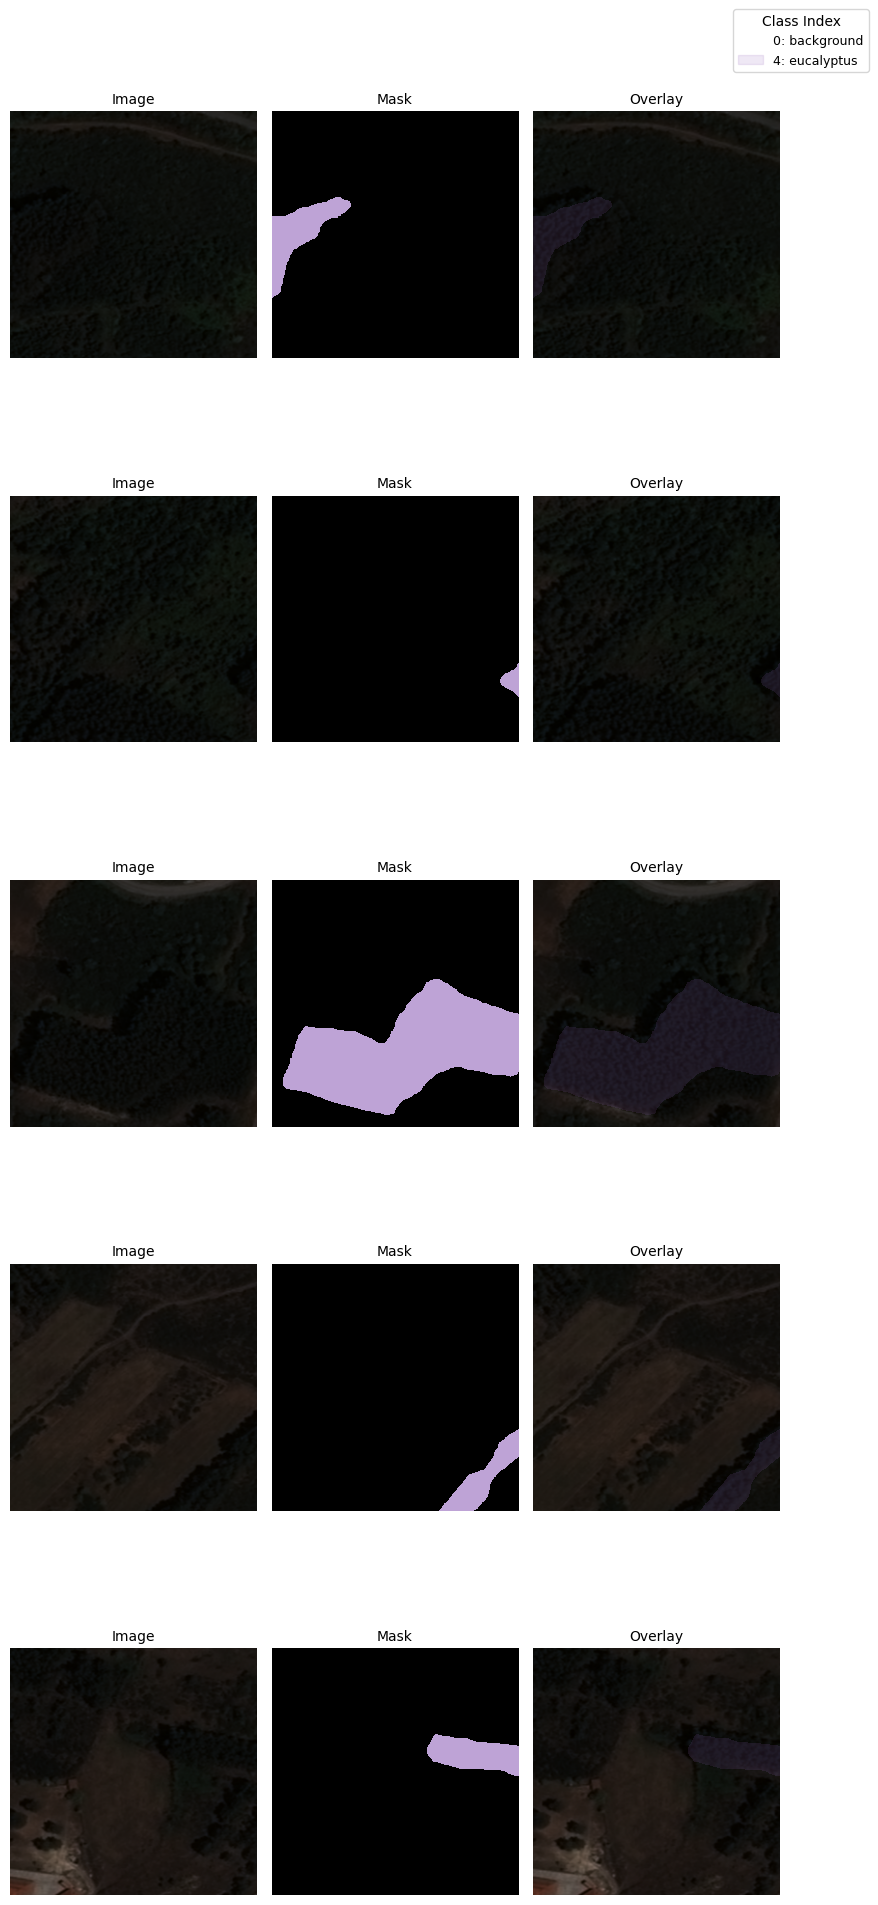

In [15]:
import importlib
importlib.reload(func)

images_dataset_dir = os.path.join(dataset_dir, 'images')
masks_dataset_dir = os.path.join(dataset_dir, 'masks')

number_of_images = 5
select_images = [1, 2, 5, 10, 15]

func.visualize_image_mask_overlay(images_dataset_dir, masks_dataset_dir, desired_classes, number_of_images, select_images)